# Spectral analysis of lithium sensitivity in proteins


Santiago Nunez-Corrales
Eric Jakobsson

Based on:

- Banerjee, A. and Jost, J., 2009. Graph spectra as a systematic tool in computational biology. Discrete Applied Mathematics, 157(10), pp.2425-2431.
- Wilson, R.C. and Zhu, P., 2008. A study of graph spectra for comparing graphs and trees. Pattern Recognition, 41(9), pp.2833-2841.


The datasets were collected based on the following information:
- Lithium sensitive kinases
    - MNK1, MNK2, smMLCK, PHK, CHK2, HIPK3, IKKϵ, TBK1, GSK3A, GSK3B
- Lithium insensitive kinases
    - MKK1, ERK1, p38γ MAPK, p38δ MAPK, ERK8, PKBα, PKCζ, PRK2, CK2, MARK3, IKKβ, DYRK3, PIM2, EF2K, PLK1, Aurora C, HIPK2, PAK4, JNK1, JNK2, p38β MAPK, PDK1, SGK1, S6K1, PKA, ROCK2, PKCα, MSK1, MAPKAP-K2, MAPKAP-K3, PRAK, CaMKKα, CaMKKβ, CHK1, CDK2, Aurora B, CK1, PIM1, PIM3, NEK7, MST2, PAK5, PAK6, CSK, Yes, FGF-R1, Eph-A2 (Ephrin-A2 receptor), ERK2, JNK3, p38α MAPK, RSK1, RSK2, PKBβ, PKD1, AMPK, CaMK1, BRSK2, MELK, DYRK1a, DYRK2, NEK2a, NEK6, SRPK1, Src, Lck, RIP2, GAK, c-Raf, B-Raf

In [1]:
import Bio
from Bio.PDB import PDBList

Create a list of lithium sensitive protein structures and save them

In [115]:
pdbl = PDBList()
PDBlithiumsensitive = ['5vwd', '6ck3', '2hqw', '2phk', '2cn5',
                       '3ezq', '3uli', '6boe', '1i09']

# Important: no structure found for GSK3A

for i in PDBlithiumsensitive:
    pdbl.retrieve_pdb_file(i, pdir='PDB_lithium_sensitive',
                           file_format='pdb')

Structure exists: 'PDB_lithium_sensitive/pdb5vwd.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb6ck3.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb2hqw.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb2phk.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb2cn5.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb3ezq.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb3uli.ent' 
Structure exists: 'PDB_lithium_sensitive/pdb6boe.ent' 


Repeat for lithium insensitive proteins

In [116]:
PDBlithiumINsensitive = ['4ark', '4qtb', '1cm8', '2y9q', '1kv2',
                         '3fl5', '3cxw', '2fk9', '4crs', '3w8l',
                         '2qnj', '4kik', '5y86', '2iwi', '1bf6',
                         '4j52', '4fie', '4qtd', '3e7o', '3gp0',
                         '2z7q', '4l6q', '3iw4', '3wi6', '3fhr',
                         '6ccf', '6bqq', '4fsm', '6ath', '5odt',
                         '6gzd', '2o3p', '6gt1', '5dh3', '4ks7',
                         '3d7t', '5zv2', '2wo3', '2erk', '4kke',
                         '5mty', '2z7r', '4nus', '2jdr', '6b2e',
                         '4fg7', '4d2p', '3anq', '3k2l', '5m51',
                         '6h0o', '1wak', '2pl0', '6fu5', '4o38',
                         '3omv', '5csw']

# Important: no structures found for Aurora kinase C, HIPK2, SGK1, S6K1
#            PKA, MSK1, PRAK, PIM3, PAK5, YES, PDK1, BRSK2, SRC 

for i in PDBlithiumINsensitive:
    pdbl.retrieve_pdb_file(i, pdir='PDB_lithium_INsensitive',
                           file_format='pdb')

Structure exists: 'PDB_lithium_INsensitive/pdb4ark.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb4qtb.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb1cm8.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb2y9q.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb1kv2.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb3fl5.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb3cxw.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb2fk9.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb4crs.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb3w8l.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb2qnj.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb4kik.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb5y86.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb2iwi.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb1bf6.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb4j52.ent' 
Structure exists: 'PDB_lithium_INsensitive/pdb4fie.ent' 
Structure exists: 'PDB_lithium_

Import and use the spectral graph density tool

In [117]:
%matplotlib inline

import matplotlib
import spectralmetabolites.single_protein as spsp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Define drawing parameters for all networks
options = {
    'node_color': 'black',
    'node_size': 10,
    'width': 0.5,
}

# Also, create a graph list that we can append with tagging
proteinList = []

Get ready to use files in the directory

In [118]:
import os

li_sens_path = './PDB_lithium_sensitive'
li_INsens_path = './PDB_lithium_INsensitive'

Generalize for lithium sensitive proteins

pdb6ck3.ent
Eigenvalue structure


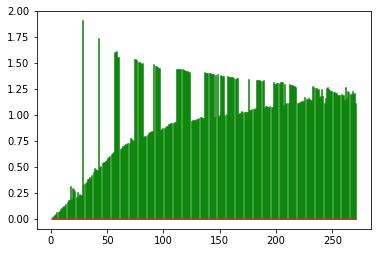

Spectral graph visualization


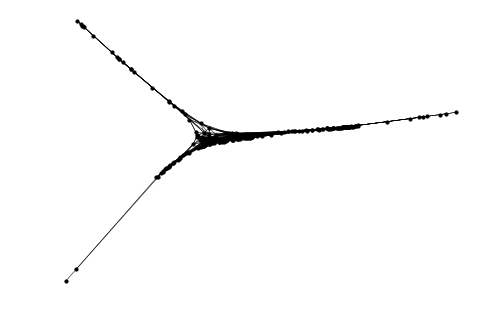




pdb2hqw.ent
Eigenvalue structure


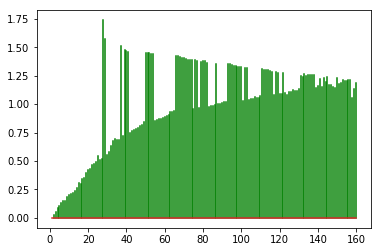

Spectral graph visualization


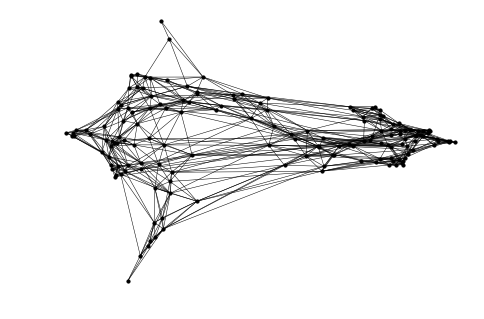




pdb3ezq.ent
Eigenvalue structure


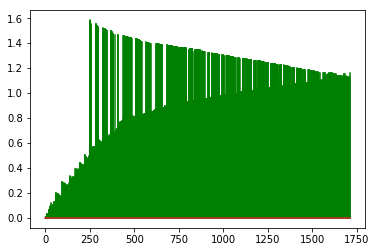

Spectral graph visualization


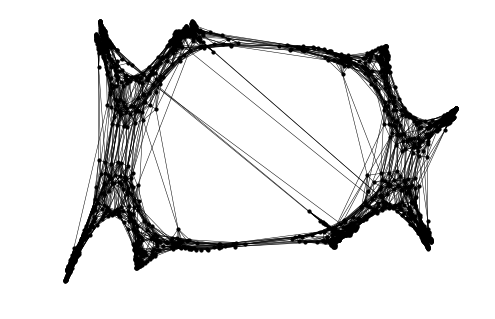




pdb2phk.ent
Eigenvalue structure


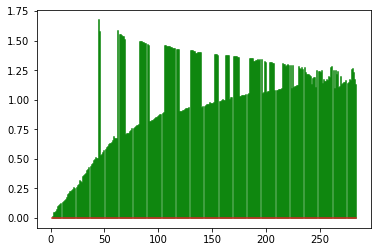

Spectral graph visualization


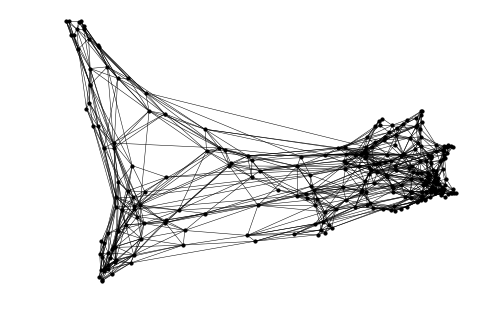




pdb1i09.ent
Eigenvalue structure


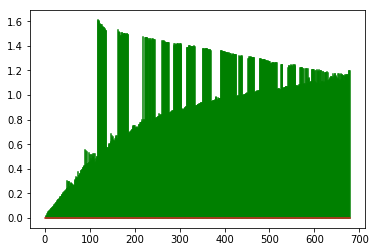

Spectral graph visualization


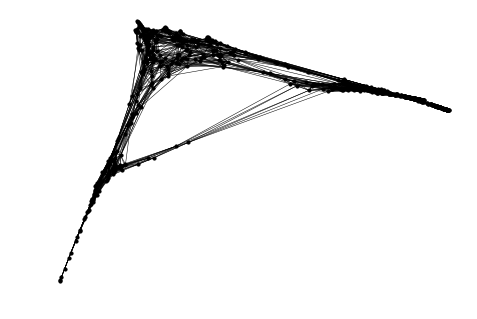




pdb6boe.ent
Eigenvalue structure


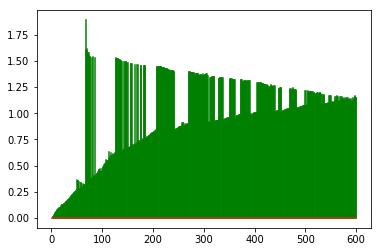

Spectral graph visualization


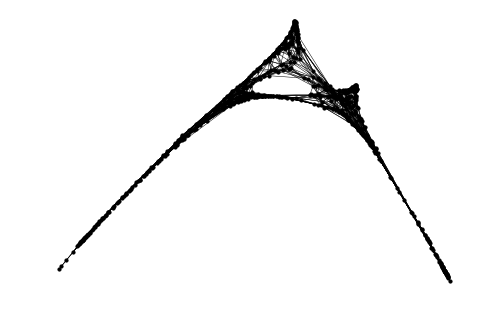




pdb3uli.ent
Eigenvalue structure


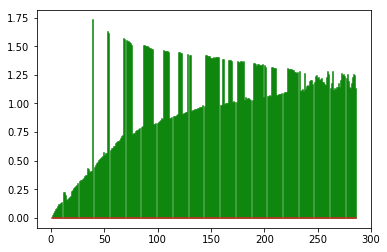

Spectral graph visualization


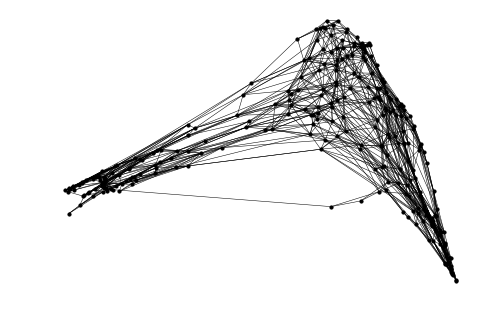




pdb2cn5.ent
Eigenvalue structure


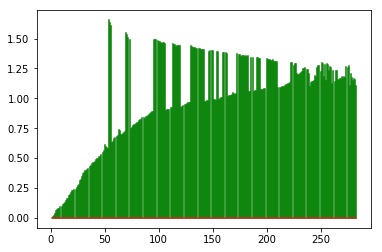

Spectral graph visualization


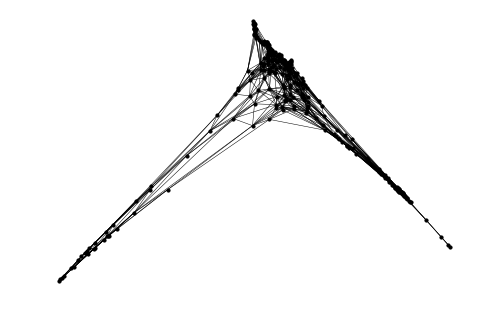




pdb5vwd.ent
Eigenvalue structure


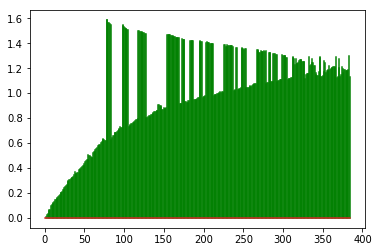

Spectral graph visualization


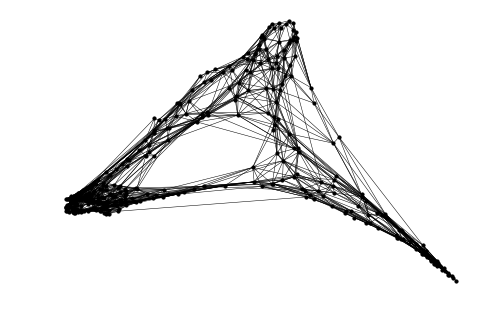

In [119]:
li_sens_prots = os.listdir(li_sens_path)

# Process all proteins first
for i, structure in enumerate(li_sens_prots, 1):
    print(structure)
    print('===========')
    print('Eigenvalue structure')
    plt.figure()
    g = spsp.process_single_prot(li_sens_path + '/' + structure, list=False, graph=True)
    proteinList.append((structure, g))
    plt.show()
    print('Spectral graph visualization')
    plt.figure()
    nx.draw_spectral(g, **options)
    plt.show()
    print('\n\n')

Repeat the analysis for lithium INsensitive proteins

pdb3gp0.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


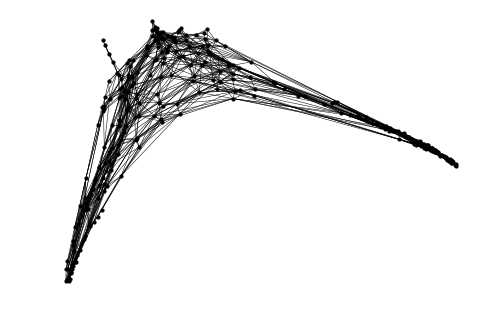




pdb2z7q.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


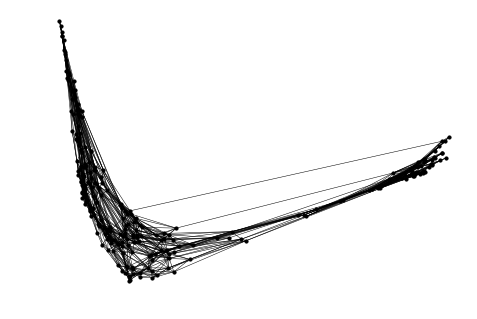




pdb3w8l.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


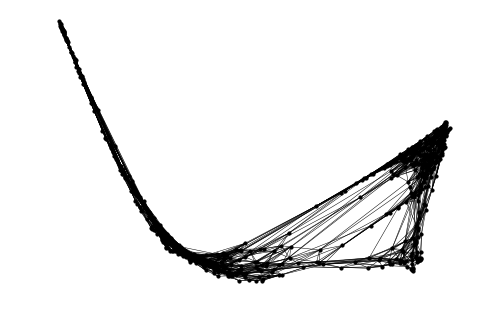




pdb4j52.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


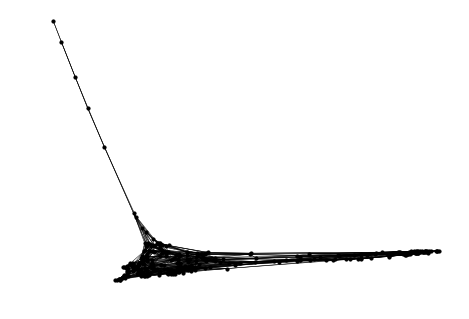




pdb2jdr.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


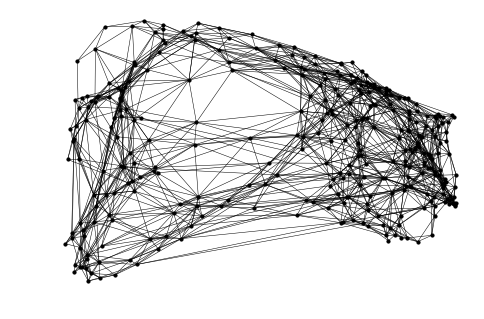




pdb2z7r.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


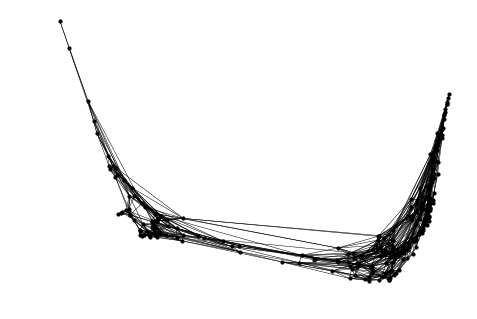




pdb5dh3.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


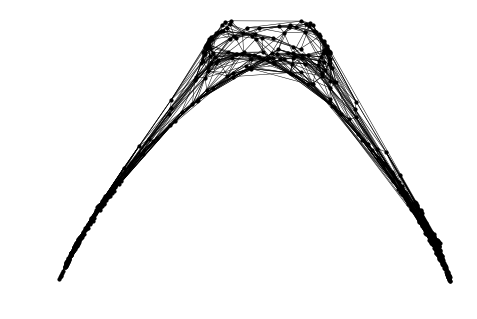




pdb4crs.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


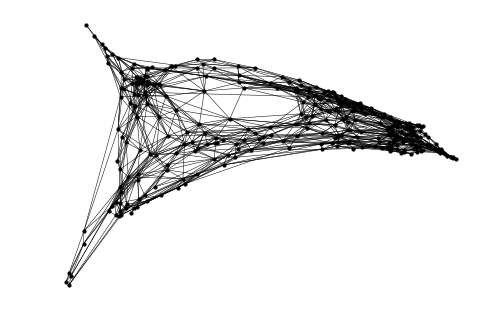




pdb6fu5.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


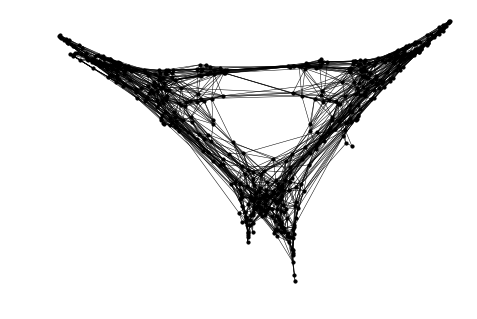




pdb3k2l.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


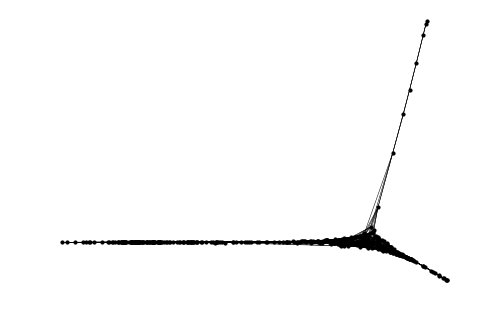




pdb5zv2.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


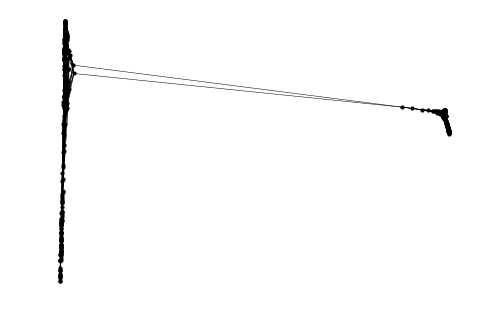




pdb1cm8.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


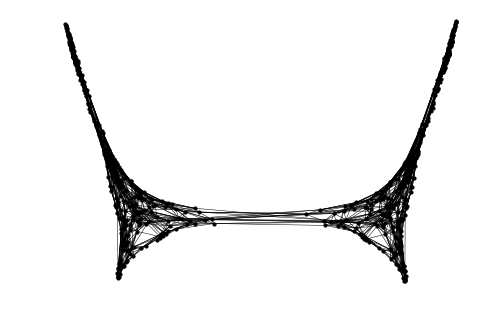




pdb5y86.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


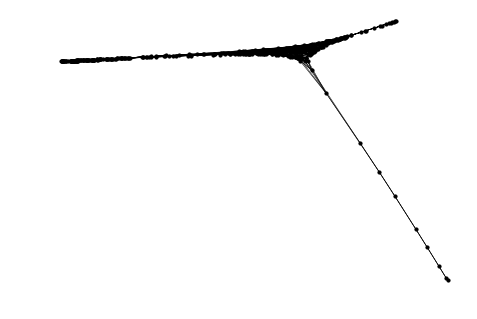




pdb2wo3.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


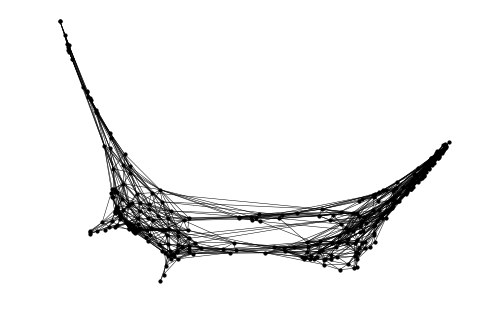




pdb6h0o.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


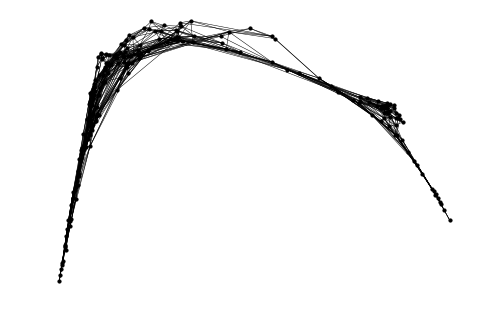




pdb3anq.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


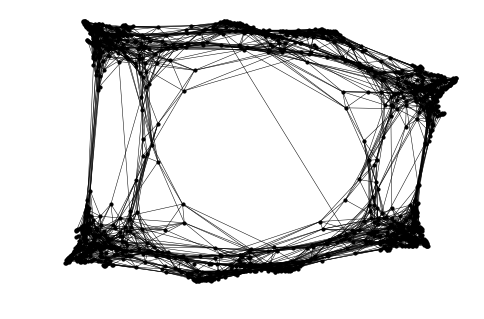




pdb3e7o.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


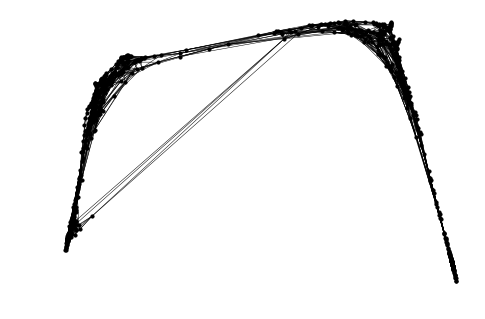




pdb3fhr.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


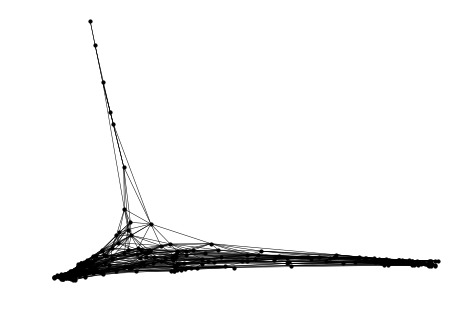




pdb6gt1.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


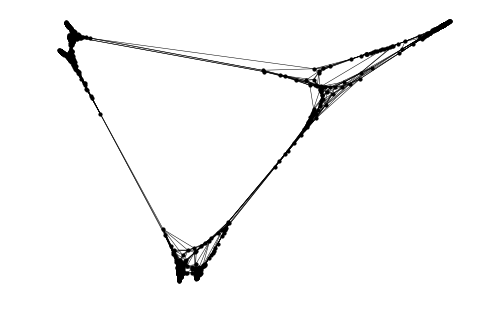




pdb3omv.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


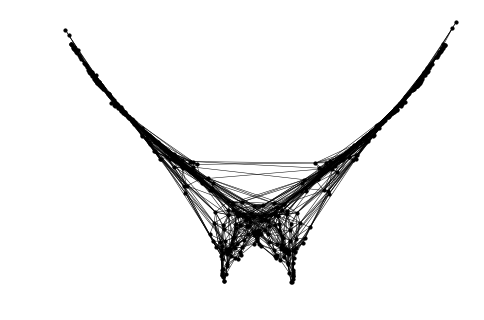




pdb2o3p.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


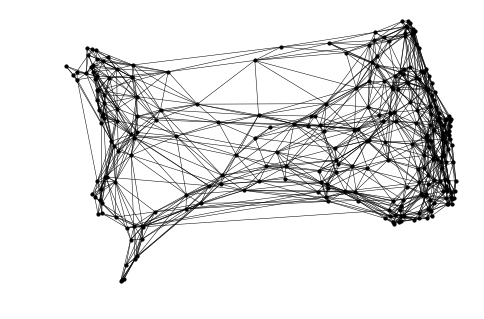




pdb4fg7.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


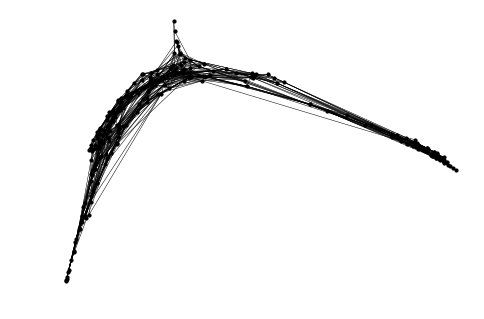




pdb1kv2.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


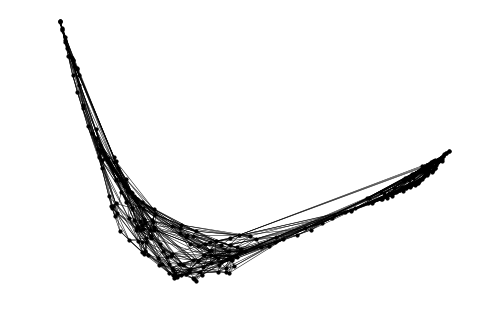




pdb1bf6.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


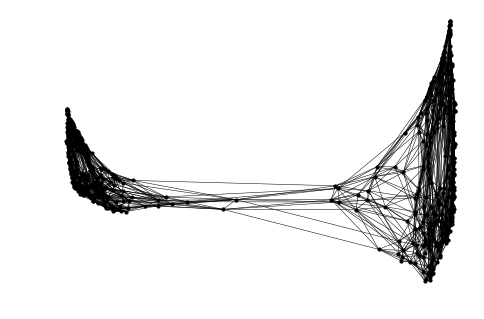




pdb6ccf.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


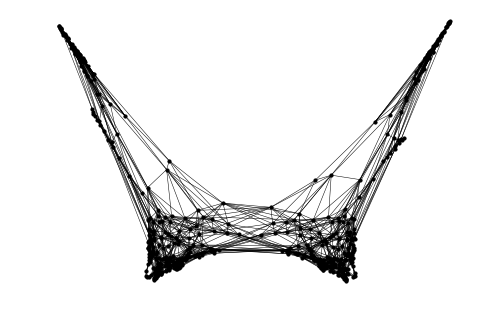




pdb3cxw.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


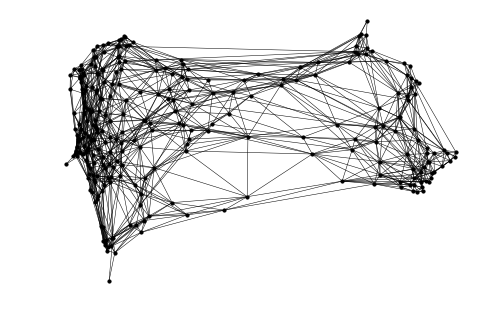




pdb6b2e.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


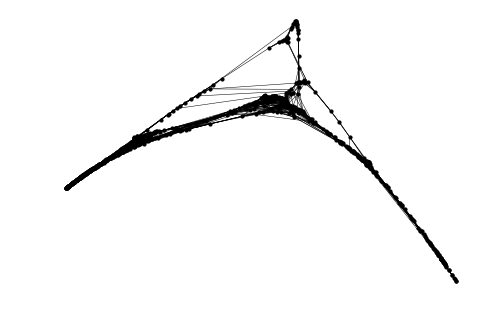




pdb2y9q.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


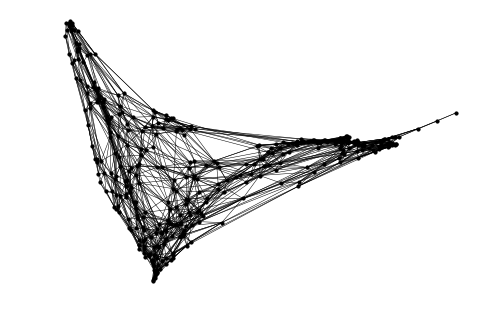




pdb4d2p.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


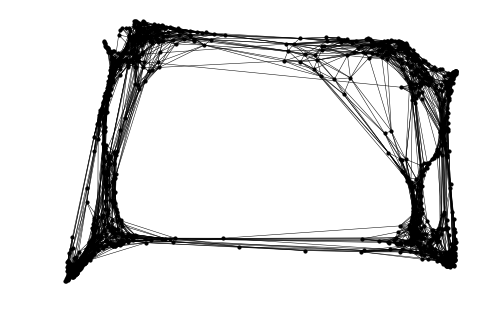




pdb4fie.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


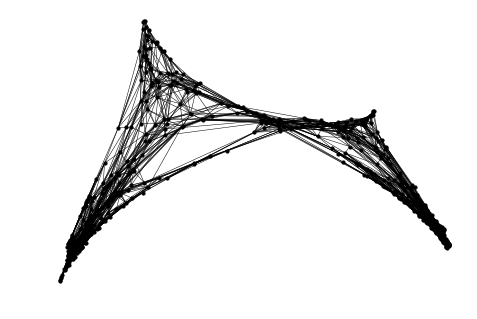




pdb5odt.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


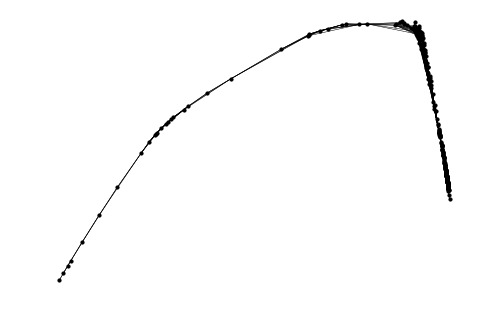




pdb6ath.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


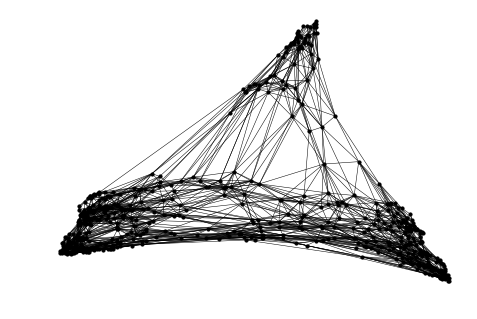




pdb6bqq.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


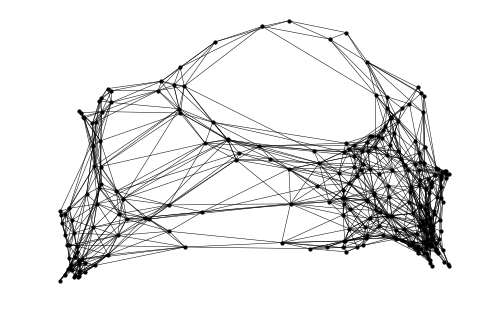




pdb6gzd.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


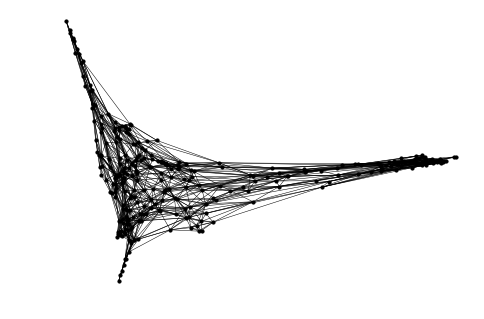




pdb2qnj.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


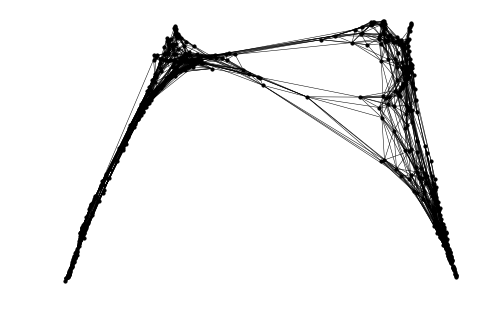




pdb5csw.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


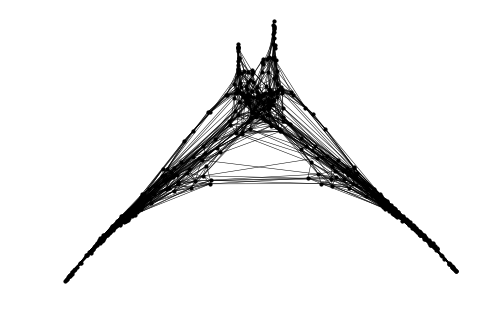




pdb3iw4.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


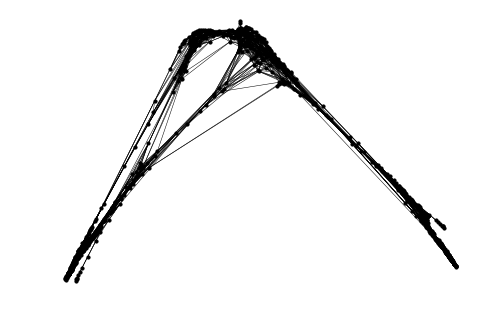




pdb3wi6.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


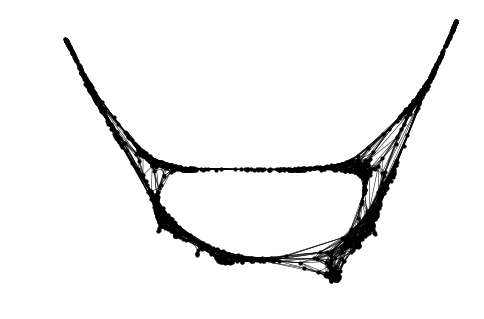




pdb2erk.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


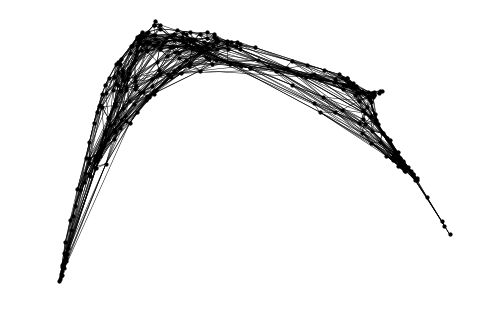




pdb4fsm.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


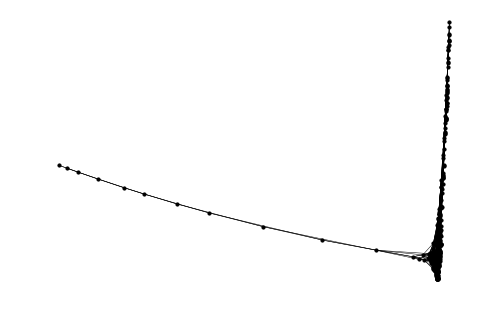




pdb3d7t.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


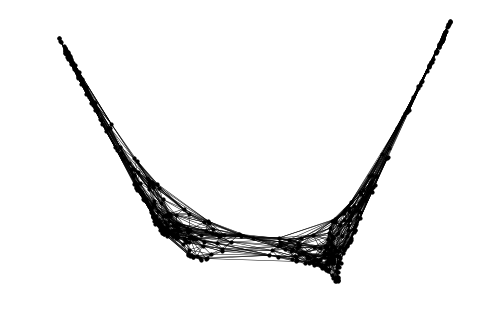




pdb4qtb.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


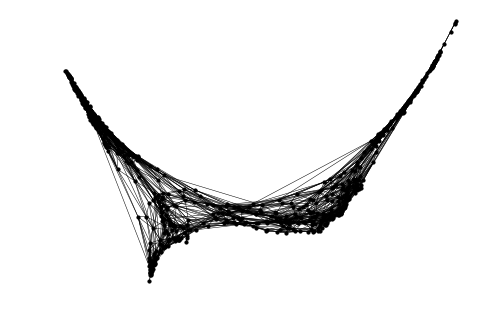




pdb4l6q.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


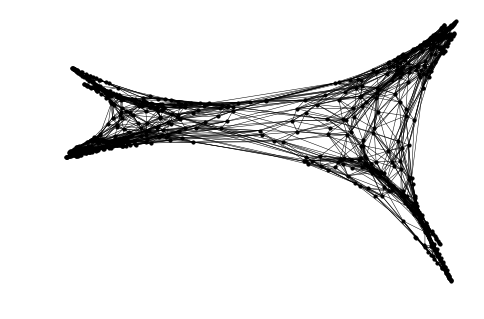




pdb5mty.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


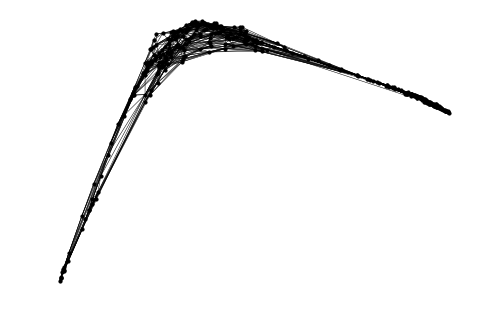




pdb1wak.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


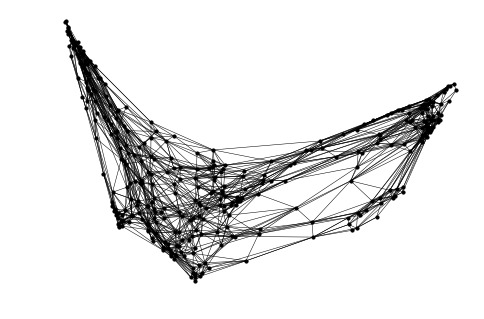




pdb4ark.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


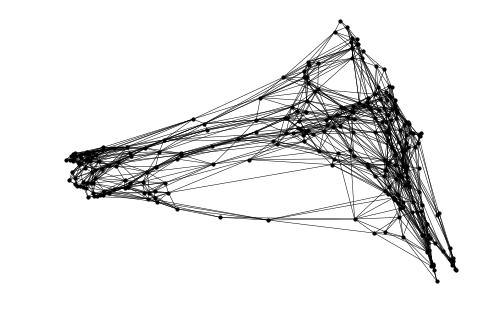




pdb2pl0.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


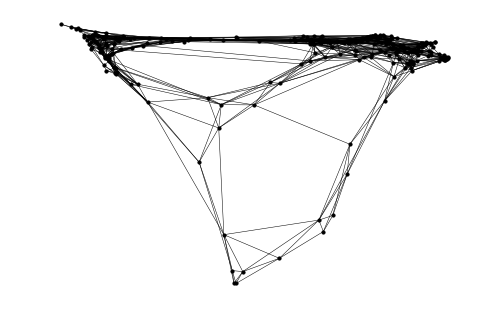




pdb3fl5.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


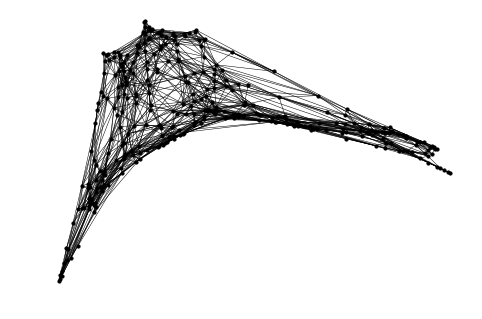




pdb4kik.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


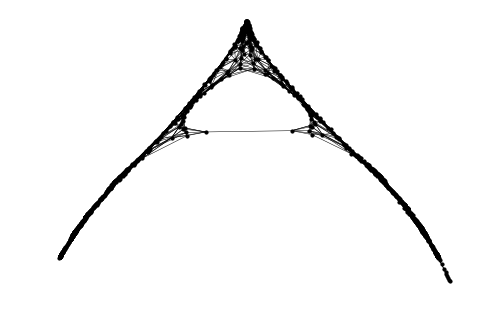




pdb2fk9.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


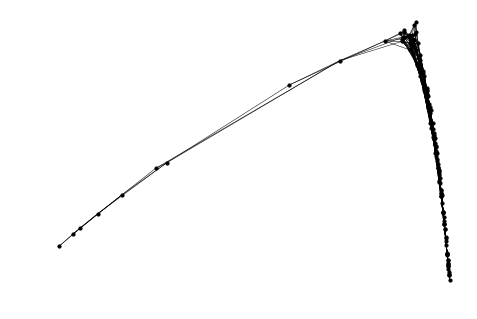




pdb4ks7.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


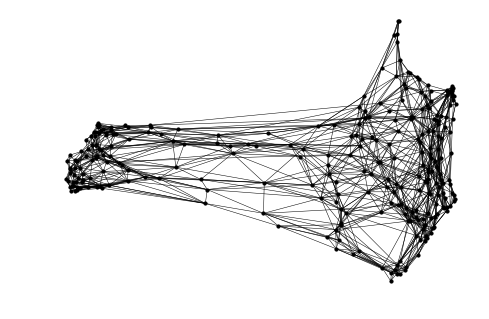




pdb4qtd.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


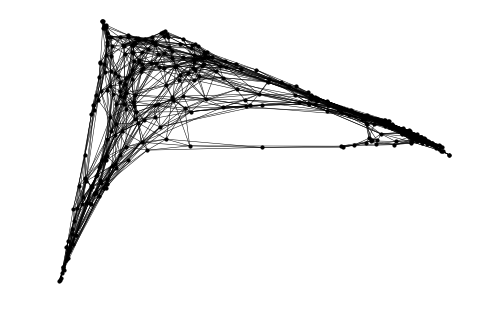




pdb4o38.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


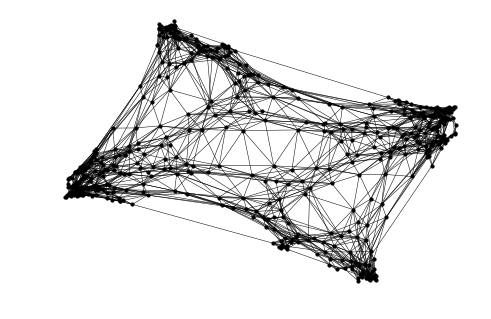




pdb4nus.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


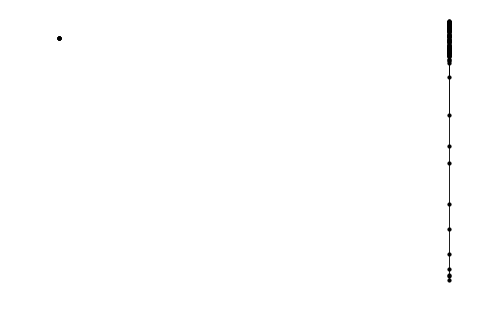




pdb2iwi.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


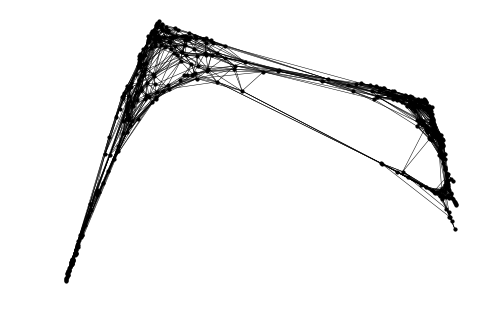




pdb5m51.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


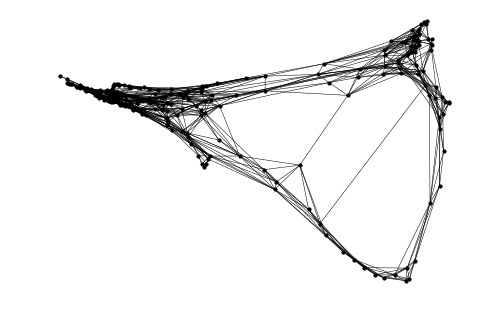




pdb4kke.ent
Eigenvalue structure


<Figure size 432x288 with 0 Axes>

Spectral graph visualization


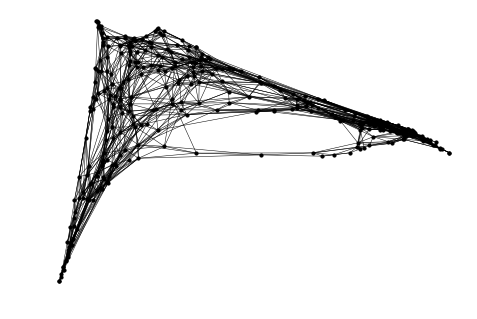

In [120]:
li_INsens_prots = os.listdir(li_INsens_path)

# Process all proteins first
for i, structure in enumerate(li_INsens_prots, 1):
    print(structure)
    print('===========')
    print('Eigenvalue structure')
    plt.figure()
    g = spsp.process_single_prot(li_INsens_path + '/' + structure, list=False, graph=False)
    proteinList.append((structure, g))
    plt.show()
    print('Spectral graph visualization')
    plt.figure()
    nx.draw_spectral(g, **options)
    plt.show()
    print('\n\n')

Obtain the list of eigenvalues from the stored graphs

In [121]:
eigenList = []

for graph in proteinList:
    label, g = graph
    print('Processing ' + label + '...')
    eigenList.append(spsp.return_single_prot_eigvals(g))

Processing pdb6ck3.ent...
Processing pdb2hqw.ent...
Processing pdb3ezq.ent...
Processing pdb2phk.ent...
Processing pdb1i09.ent...
Processing pdb6boe.ent...
Processing pdb3uli.ent...
Processing pdb2cn5.ent...
Processing pdb5vwd.ent...
Processing pdb3gp0.ent...
Processing pdb2z7q.ent...
Processing pdb3w8l.ent...
Processing pdb4j52.ent...
Processing pdb2jdr.ent...
Processing pdb2z7r.ent...
Processing pdb5dh3.ent...
Processing pdb4crs.ent...
Processing pdb6fu5.ent...
Processing pdb3k2l.ent...
Processing pdb5zv2.ent...
Processing pdb1cm8.ent...
Processing pdb5y86.ent...
Processing pdb2wo3.ent...
Processing pdb6h0o.ent...
Processing pdb3anq.ent...
Processing pdb3e7o.ent...
Processing pdb3fhr.ent...
Processing pdb6gt1.ent...
Processing pdb3omv.ent...
Processing pdb2o3p.ent...
Processing pdb4fg7.ent...
Processing pdb1kv2.ent...
Processing pdb1bf6.ent...
Processing pdb6ccf.ent...
Processing pdb3cxw.ent...
Processing pdb6b2e.ent...
Processing pdb2y9q.ent...
Processing pdb4d2p.ent...
Processing p

Obtain the distribution of average number of eigenvalues using a histogram.

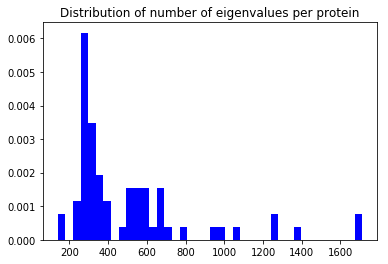

In [122]:
eigenHD = np.asarray(list(map(lambda x: len(x), eigenList)))

plt.hist(eigenHD, 40, density=True, facecolor='b')
plt.title('Distribution of number of eigenvalues per protein')
plt.show()

Create a list of labels that contain an "S-" prefix for lithium sensitive and an "I-" prefix for lithium insensitive. This will be useful later for visualizing the correlogram matrix. Also, build a Boolean vector for the SVN predictor.

In [123]:
labelsList = []
predictList = []

for sensitive in li_sens_prots:
    labelsList.append('S-' + sensitive[3:7])
    predictList.append(1)
    
for insensitive in li_INsens_prots:
    labelsList.append('I-' + insensitive[3:7])
    predictList.append(0)
    
print(labelsList)
print(predictList)

['S-6ck3', 'S-2hqw', 'S-3ezq', 'S-2phk', 'S-1i09', 'S-6boe', 'S-3uli', 'S-2cn5', 'S-5vwd', 'I-3gp0', 'I-2z7q', 'I-3w8l', 'I-4j52', 'I-2jdr', 'I-2z7r', 'I-5dh3', 'I-4crs', 'I-6fu5', 'I-3k2l', 'I-5zv2', 'I-1cm8', 'I-5y86', 'I-2wo3', 'I-6h0o', 'I-3anq', 'I-3e7o', 'I-3fhr', 'I-6gt1', 'I-3omv', 'I-2o3p', 'I-4fg7', 'I-1kv2', 'I-1bf6', 'I-6ccf', 'I-3cxw', 'I-6b2e', 'I-2y9q', 'I-4d2p', 'I-4fie', 'I-5odt', 'I-6ath', 'I-6bqq', 'I-6gzd', 'I-2qnj', 'I-5csw', 'I-3iw4', 'I-3wi6', 'I-2erk', 'I-4fsm', 'I-3d7t', 'I-4qtb', 'I-4l6q', 'I-5mty', 'I-1wak', 'I-4ark', 'I-2pl0', 'I-3fl5', 'I-4kik', 'I-2fk9', 'I-4ks7', 'I-4qtd', 'I-4o38', 'I-4nus', 'I-2iwi', 'I-5m51', 'I-4kke']
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Produce a new list that contains the necessary padding to use various distance metrics. We construct one matrix per distance metric and visualize it.

In [124]:
maxEigenLength = max(list(map(lambda x: len(x), eigenList)))
paddedEigenList = list(map(lambda x: np.pad(x, (0, maxEigenLength - len(x)), 'constant', constant_values=(_,0)), eigenList))

Use scipy package to compute distance matrices using various distance functions. Encapsulate all using a function that takes a distance metric and outputs the respective matrix.

In [125]:
from scipy.spatial import distance

def compute_matrix(distf, eigvals):
    rank = len(eigvals) 
    mat = np.zeros((rank,rank))
    
    for i, a in enumerate(eigvals):
        for j, b in enumerate(eigvals):
            if (i != j):
                mat[i][j] = distf(a, b)
                
    return mat

Build a matrix per each distance function using the general function and convert it to a pandas dataframe.

In [126]:
import pandas as pd

# Euclidean distance
eucMat =  pd.DataFrame(data=compute_matrix(distance.euclidean, paddedEigenList), index=labelsList, columns=labelsList)

# Bray-Curtis distance
bcMat =  pd.DataFrame(data=compute_matrix(distance.braycurtis, paddedEigenList), index=labelsList, columns=labelsList)

# Canberra distance
canMat =  pd.DataFrame(data=compute_matrix(distance.canberra, paddedEigenList), index=labelsList, columns=labelsList)

# Canberra distance
chebMat =  pd.DataFrame(data=compute_matrix(distance.chebyshev, paddedEigenList), index=labelsList, columns=labelsList)

# City block distance
ctbMat =  pd.DataFrame(data=compute_matrix(distance.cityblock, paddedEigenList), index=labelsList, columns=labelsList)

# Correlation distance
corrMat =  pd.DataFrame(data=compute_matrix(distance.correlation, paddedEigenList), index=labelsList, columns=labelsList)

# Cosine distance
cosMat =  pd.DataFrame(data=compute_matrix(distance.cosine, paddedEigenList), index=labelsList, columns=labelsList)

Now, use seaborn to show the heat map resulting from the matrices.

In [127]:
import seaborn as sns
import matplotlib.pylab as plb

<Figure size 1440x1440 with 0 Axes>

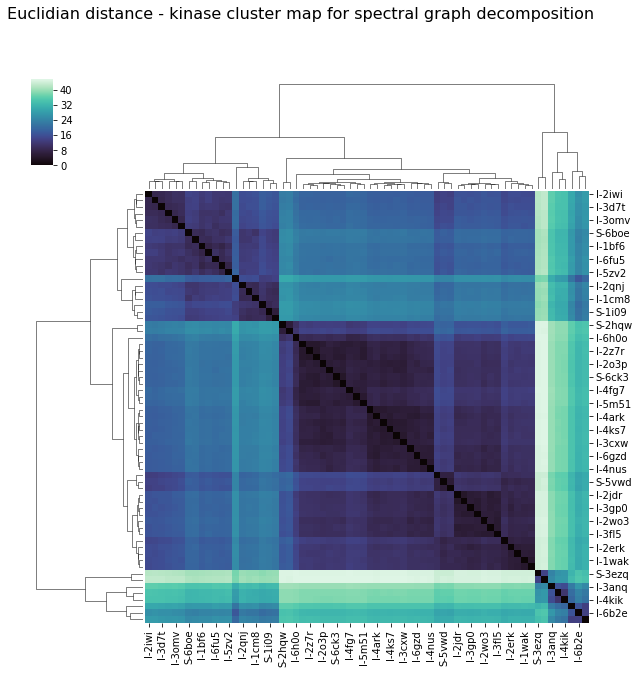

In [128]:
plt.figure(figsize=(20, 20))
eucCL = sns.clustermap(eucMat, cmap="mako")
fig = eucCL.fig
fig.suptitle('Euclidian distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("eucCluster.pdf", format='pdf', dpi=900)
plt.show()

<Figure size 1440x1440 with 0 Axes>

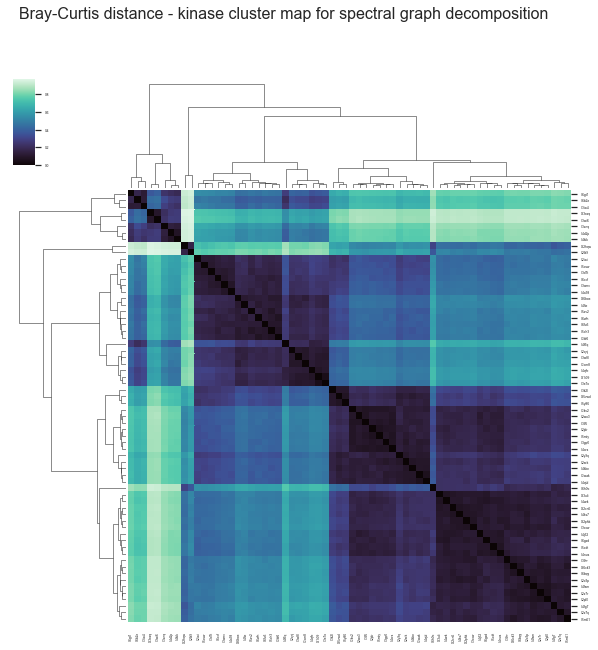

In [118]:
plt.figure(figsize=(20, 20))
bcCL = sns.clustermap(bcMat, cmap="mako")
fig = bcCL.fig
fig.suptitle('Bray-Curtis distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("bcCluster.pdf", format='pdf', dpi=900)
plt.show()

<Figure size 1440x1440 with 0 Axes>

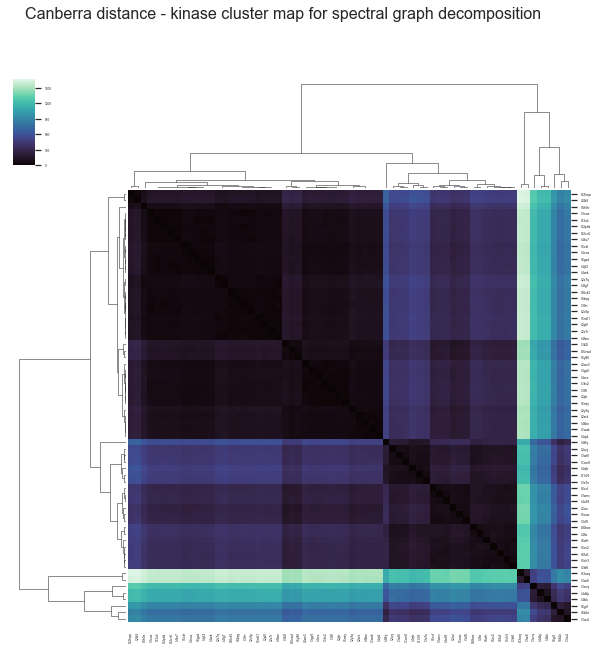

In [119]:
plt.figure(figsize=(20, 20))
canCL = sns.clustermap(canMat, cmap="mako")
fig = canCL.fig
fig.suptitle('Canberra distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("canCluster.pdf", format='pdf', dpi=900)
plt.show()

<Figure size 1440x1440 with 0 Axes>

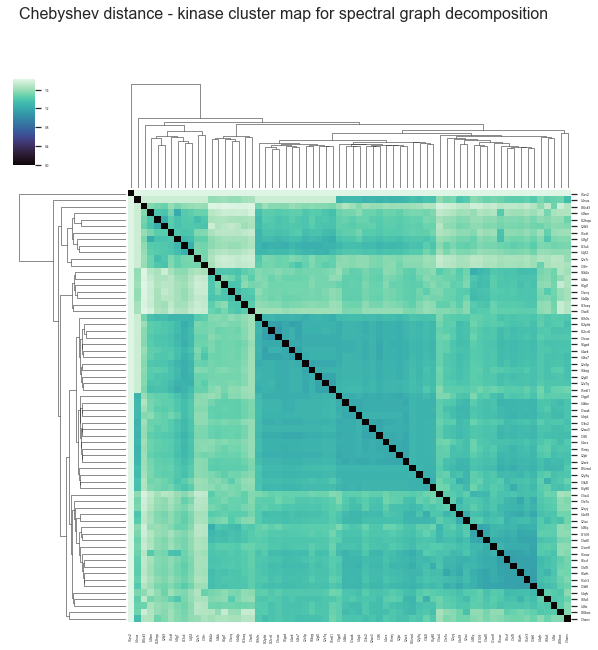

In [120]:
plt.figure(figsize=(20, 20))
chebCL = sns.clustermap(chebMat, cmap="mako")
fig = chebCL.fig
fig.suptitle('Chebyshev distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("chevCluster.pdf", format='pdf', dpi=900)
plt.show()

<Figure size 1440x1440 with 0 Axes>

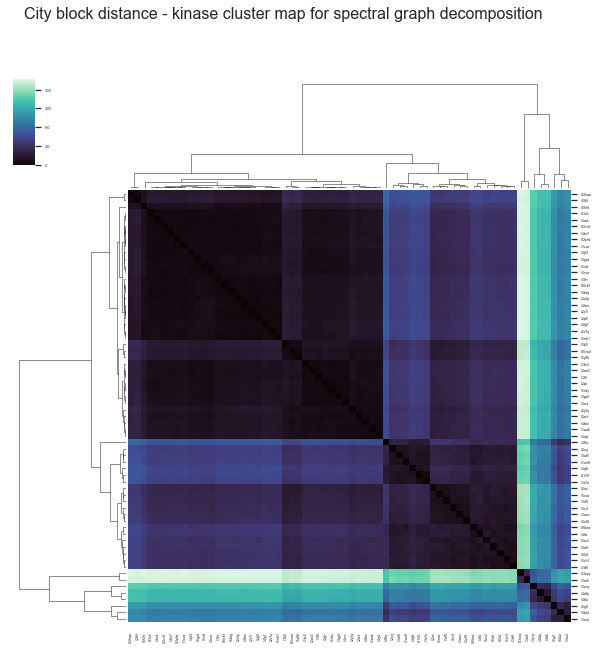

In [121]:
plt.figure(figsize=(20, 20))
ctbCL = sns.clustermap(ctbMat, cmap="mako")
fig = ctbCL.fig
fig.suptitle('City block distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("ctbCluster.pdf", format='pdf', dpi=900)
plt.show()

<Figure size 1440x1440 with 0 Axes>

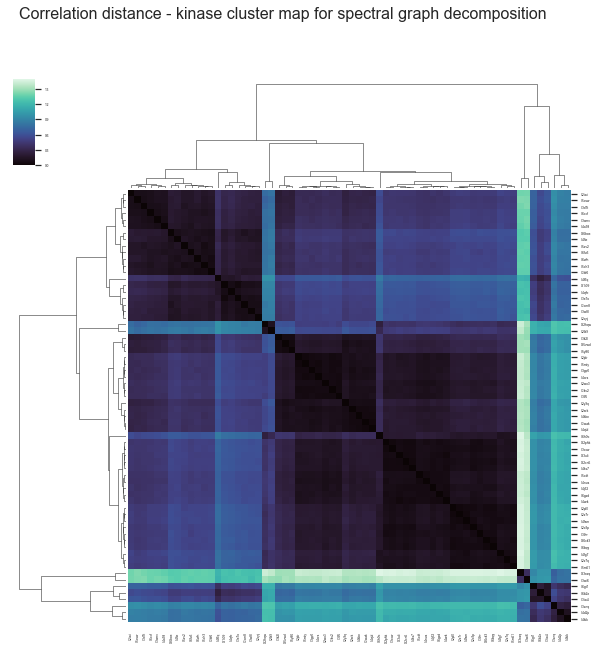

In [123]:
plt.figure(figsize=(20, 20))
corrCL = sns.clustermap(corrMat, cmap="mako")
fig = corrCL.fig
fig.suptitle('Correlation distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("corrCluster.pdf", format='pdf', dpi=900)
plt.show()

<Figure size 1440x1440 with 0 Axes>

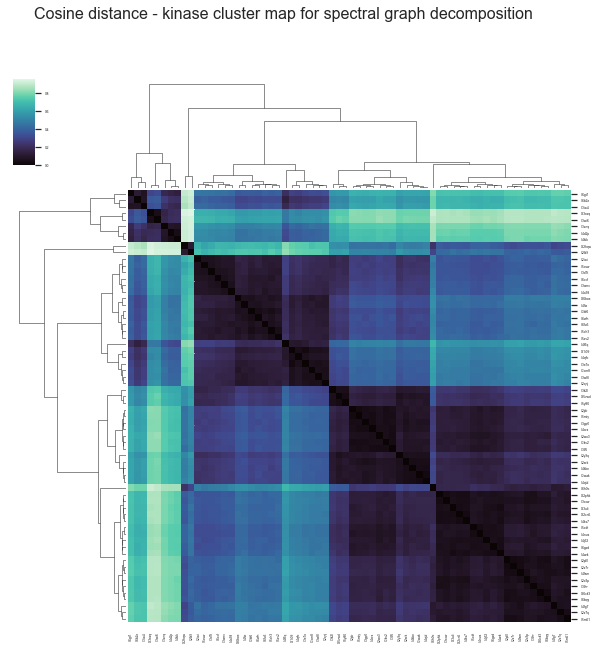

In [124]:
plt.figure(figsize=(20, 20))
cosCL = sns.clustermap(cosMat, cmap="mako")
fig = cosCL.fig
fig.suptitle('Cosine distance - kinase cluster map for spectral graph decomposition', fontsize=16)
fig.savefig("cosCluster.pdf", format='pdf', dpi=900)
plt.show()

Given that no distance function reveals a clustering exclusively in terms of lithium sensitivity, we turn to a a classifier to find features that may help separate structures between lithium sensitive and lithium insensitive.

In [129]:
eigenData = np.asarray(paddedEigenList)
predictData = np.array([np.asarray(predictList)]).T

from sklearn.svm import SVC

classifier = SVC(kernel='sigmoid', probability=True)
classifier.fit(eigenData, predictData)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

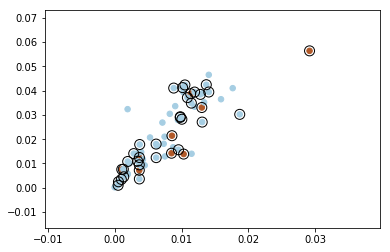

In [130]:
plt.scatter(eigenData[:, 1], eigenData[:, 2], c=predictList, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

ax.scatter(classifier.support_vectors_[:, 1], classifier.support_vectors_[:,2], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

#Z = classifier.decision_function(xy).reshape(XX.shape)

Now, establish a testing set for the classifier.

Structure exists: 'PDB_testing/pdb4as4.ent' 
pdb4as4.ent
Eigenvalue structure


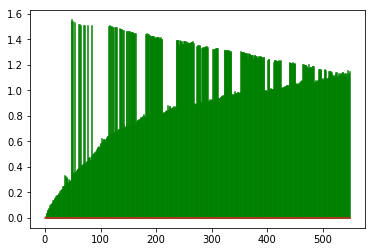

Spectral graph visualization


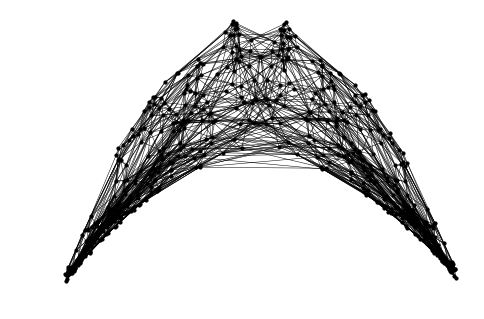




pdb1i09.ent
Eigenvalue structure


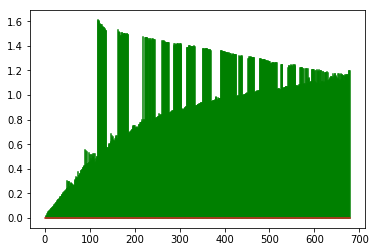

Spectral graph visualization


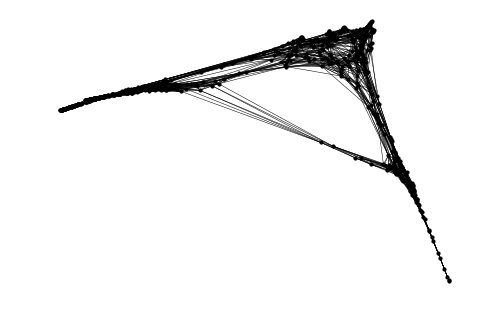




Processing pdb4as4.ent...
Processing pdb1i09.ent...


In [131]:
PDBtestset = ['4as4','1i09']

proteinTestList = []

for i in PDBtestset:
    pdbl.retrieve_pdb_file(i, pdir='PDB_testing',
                           file_format='pdb')

li_test_path = './PDB_testing'
li_test_prots = os.listdir(li_test_path)

# Process all proteins first
for i, structure in enumerate(li_test_prots, 1):
    print(structure)
    print('===========')
    print('Eigenvalue structure')
    plt.figure()
    g = spsp.process_single_prot(li_test_path + '/' + structure, list=False, graph=True)
    proteinTestList.append((structure, g))
    plt.show()
    print('Spectral graph visualization')
    plt.figure()
    nx.draw_spectral(g, **options)
    plt.show()
    print('\n\n')
    
eigenTestList = []

for graph in proteinTestList:
    label, g = graph
    print('Processing ' + label + '...')
    eigenTestList.append(spsp.return_single_prot_eigvals(g))
    
paddedEigenTestList = list(map(lambda x: np.pad(x, (0, maxEigenLength - len(x)), 'constant', constant_values=(_,0)), eigenTestList))

Test the prediction:

In [132]:
classifier.predict(np.array(paddedEigenTestList))

array([0, 0])